In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle

In [2]:
data = pd.read_csv("Latest9.csv")


In [21]:
df = data.drop('Unnamed: 0', axis = 1)
df = data.loc[df.Innings == 1]
df['Final_score']=df['Target Score']-1
df.reset_index()
df['Balls_left'] = 126 - (6*df['Over'] + df['Ball'])
df['Balls_bowled'] = 120 - df['Balls_left']
df = df.drop(['Unnamed: 0', 'Match ID','Innings','Over', 'Ball','RRR','Target Score','Chased Successfully','Unnamed: 0.4','Unnamed: 0.3','Unnamed: 0.2','Unnamed: 0.1'], axis =1)
df

C:\Users\jains\AppData\Local\Temp\ipykernel_7760\2965438247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Final_score']=df['Target Score']-1
C:\Users\jains\AppData\Local\Temp\ipykernel_7760\2965438247.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Balls_left'] = 126 - (6*df['Over'] + df['Ball'])
C:\Users\jains\AppData\Local\Temp\ipykernel_7760\2965438247.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,Unnamed: 0.5,Venue,Bat First,Bat Second,Innings Runs,CRR,Last Five,Wickets Left,Final_score,Balls_left,Balls_bowled
0,0,SuperSport Park,West Indies,South Africa,49,10.137931,48.0,10,258,91,29
1,1,SuperSport Park,West Indies,South Africa,53,10.600000,51.0,10,258,90,30
2,2,SuperSport Park,West Indies,South Africa,57,11.032258,54.0,9,258,89,31
3,3,SuperSport Park,West Indies,South Africa,61,11.437500,58.0,9,258,88,32
4,4,SuperSport Park,West Indies,South Africa,62,11.272727,58.0,9,258,87,33
...,...,...,...,...,...,...,...,...,...,...,...
112278,112278,Dubai International Cricket Stadium,Pakistan,New Zealand,148,7.655172,38.0,7,153,4,116
112279,112279,Dubai International Cricket Stadium,Pakistan,New Zealand,149,7.641026,35.0,6,153,3,117
112280,112280,Dubai International Cricket Stadium,Pakistan,New Zealand,151,7.677966,37.0,6,153,2,118
112281,112281,Dubai International Cricket Stadium,Pakistan,New Zealand,152,7.663866,38.0,6,153,1,119


In [22]:
df['Wickets Fell'] = 10 - df['Wickets Left']

In [23]:
df = df.sample(n=len(df))
df = df.reset_index()
df = df.drop('index' ,axis =1)
df = df.drop('Unnamed: 0.5', axis =1)
df.head()


,Venue,Bat First,Bat Second,Innings Runs,CRR,Last Five,Wickets Left,Final_score,Balls_left,Balls_bowled,Wickets Fell
294,Beausejour Stadium,Pakistan,Australia,191,9.471074,59.0,7,191,-1,121,3


In [35]:
check = df.loc[df['Wickets Left']<=3]
check

,Venue,Bat First,Bat Second,Innings Runs,CRR,Last Five,Wickets Left,Final_score,Balls_left,Balls_bowled,Wickets Fell
3,Kensington Oval,England,West Indies,103,5.327586,32.0,3,103,4,116,7
110,R Premadasa Stadium,Sri Lanka,Australia,120,6.428571,32.0,3,128,8,112,7
165,Gaddafi Stadium,South Africa,Pakistan,123,7.235294,45.0,3,164,18,102,7
619,R Premadasa Stadium,Sri Lanka,Australia,125,6.410256,28.0,3,128,3,117,7
783,New Wanderers Stadium,South Africa,Sri Lanka,110,5.840708,27.0,3,113,7,113,7
...,...,...,...,...,...,...,...,...,...,...,...
58005,Dubai International Cricket Stadium,Australia,Pakistan,108,5.445378,14.0,2,108,1,119,8
58028,Eden Gardens,England,West Indies,146,7.617391,32.0,3,155,5,115,7
58329,Gaddafi Stadium,South Africa,Pakistan,125,7.142857,39.0,3,164,15,105,7
58538,Eden Gardens,England,West Indies,145,7.631579,32.0,3,155,6,114,7


In [6]:
df = pd.get_dummies(df, columns = ['Venue', 'Bat First', 'Bat Second'])
df = df*1
df.head()

,Innings Runs,CRR,Last Five,Wickets Left,Final_score,Balls_left,Balls_bowled,Wickets Fell,Venue_Adelaide Oval,Venue_Arun Jaitley Stadium,...,Bat Second_Afghanistan,Bat Second_Australia,Bat Second_Bangladesh,Bat Second_England,Bat Second_India,Bat Second_New Zealand,Bat Second_Pakistan,Bat Second_South Africa,Bat Second_Sri Lanka,Bat Second_West Indies
0,95,6.951220,23.0,7,155,38,82,3,0,0,...,0,0,0,0,0,0,0,0,0,1
1,110,7.764706,48.0,7,184,35,85,3,0,0,...,0,1,0,0,0,0,0,0,0,0
2,144,10.409639,40.0,7,220,37,83,3,0,0,...,0,0,0,0,0,0,0,1,0,0
3,177,9.315789,75.0,7,185,6,114,3,0,0,...,0,0,0,0,0,0,1,0,0,0
4,37,4.036364,21.0,8,103,65,55,2,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
df.to_csv("Data_run_predictor.csv")

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Final_score', axis=1)
y = df['Final_score']
columns = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# saving the scaler parameters
with open('scaler_run_predictor.pkl', 'wb') as file:
    pickle.dump(scaler, file)
# saving the columns file
with open('columns_run_predictor.pkl', 'wb') as file:
    pickle.dump(columns, file)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [10]:
model = Sequential([
    Dense(4, activation='relu',kernel_regularizer=l2(0.07)),
    Dense(2, activation='relu',kernel_regularizer=l2(0.07)),
    Dense(1, activation='linear', kernel_regularizer=l2(0.07)) 
])
model.compile(optimizer='adam', loss='mean_squared_error')
test_2 = model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 3s 847us/step - loss: 27101.7266
Epoch 2/50
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 17074.2715 
Epoch 3/50
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1272.8171
Epoch 4/50
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 548.7505
Epoch 5/50
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 380.2030
Epoch 6/50
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 348.8360
Epoch 7/50
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 338.4164
Epoch 8/50
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 331.6026
Epoch 9/50
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 326.1061
Epoch 10/50
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 317.2344
Epoch 11/50
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 316.5006
Epoch 12/50
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 317.8452
Epoch 13/50
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 311.8368
Epoch 14/50
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 30

In [11]:
X_check = X_test.iloc[567]
X_check

Innings Runs               27.0
CRR                         4.5
Last Five                  21.0
Wickets Left               10.0
Balls_left                 84.0
                           ... 
Bat Second_New Zealand      0.0
Bat Second_Pakistan         0.0
Bat Second_South Africa     1.0
Bat Second_Sri Lanka        0.0
Bat Second_West Indies      0.0
Name: 2399, Length: 102, dtype: float64

In [12]:
y_check = y_test.iloc[567]
y_check

86

In [13]:
X_check = X_check.values.reshape(1, -1)
X_check_scaled = scaler.transform(X_check)

C:\Users\jains\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
predictions = model.predict(X_check_scaled)
print("Predictions:")
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predictions:
[[123.444275]]


In [44]:
def get_user_input(): 
    runs = 150 #float(input("Enter current runs: ")) 
    wickets = 5 #float(input("Enter wickets fallen: "))
    balls = 108 #float(input("Enter no. of balls bowled: "))
    #target = 181 #float(input("Enter target: "))
    last_5 = 43 #float(input("Enter the runs scored in the last 5 overs: "))
    batting = "India"#input("Enter the batting team: ")
    bowling = "South Africa" #input("Enter the bowling team: ")
    venue = "Providence Stadium"#input("Enter the venue: ")
    CRR = (runs/balls)*6
    #RRR = ((target - runs)/(120 - balls))*6
    wickets_left = 10 - wickets
    balls_left = 120 - balls
    #runs_left = target - runs
    user_data = {
        'Innings Runs': [runs],
        'Last Five': [last_5],
        'CRR': [CRR],
        'Wickets Left': [wickets_left],
        'Balls_left': [balls_left],
        'Balls_bowled': [balls],
        'Wickets Fell': [wickets],
        'Venue': [venue],
        'Bat Second': [bowling],
        'Bat First': [batting]
    } 
    return pd.DataFrame(user_data)

user_input_df = get_user_input()
user_input_encoded = pd.get_dummies(user_input_df)
user_input_encoded = user_input_encoded.reindex(columns=columns, fill_value=0)
user_input_encoded = user_input_encoded*1
print(user_input_encoded)
user_input_scaled = scaler.transform(user_input_encoded)
predictions = model.predict(user_input_scaled)
## if ans current se kam aa jaaye
## if wickets =10
## if balls = 120
print("Predictions: ", predictions)

   Innings Runs       CRR  Last Five  Wickets Left  Balls_left  Balls_bowled  \
0           150  8.333333         43             5          12           108   

   Wickets Fell  Venue_Adelaide Oval  Venue_Arun Jaitley Stadium  \
0             5                    0                           0   

   Venue_Barabati Stadium  ...  Bat Second_Afghanistan  Bat Second_Australia  \
0                       0  ...                       0                     0   

   Bat Second_Bangladesh  Bat Second_England  Bat Second_India  \
0                      0                   0                 0   

   Bat Second_New Zealand  Bat Second_Pakistan  Bat Second_South Africa  \
0                       0                    0                        1   

   Bat Second_Sri Lanka  Bat Second_West Indies  
0                     0                       0  

[1 rows x 102 columns]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predictions:  [[164.14561]]


In [40]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step
1473/1473 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step


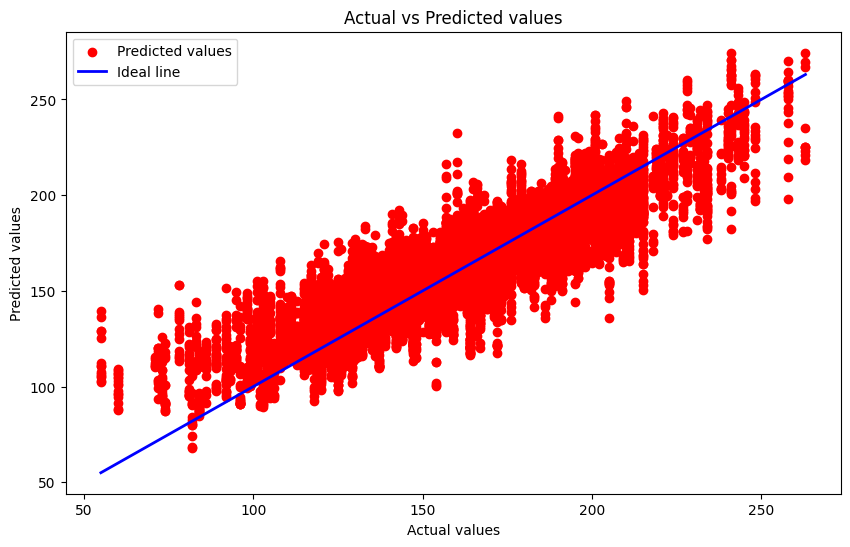

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', label='Predicted values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linewidth=2, label='Ideal line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()

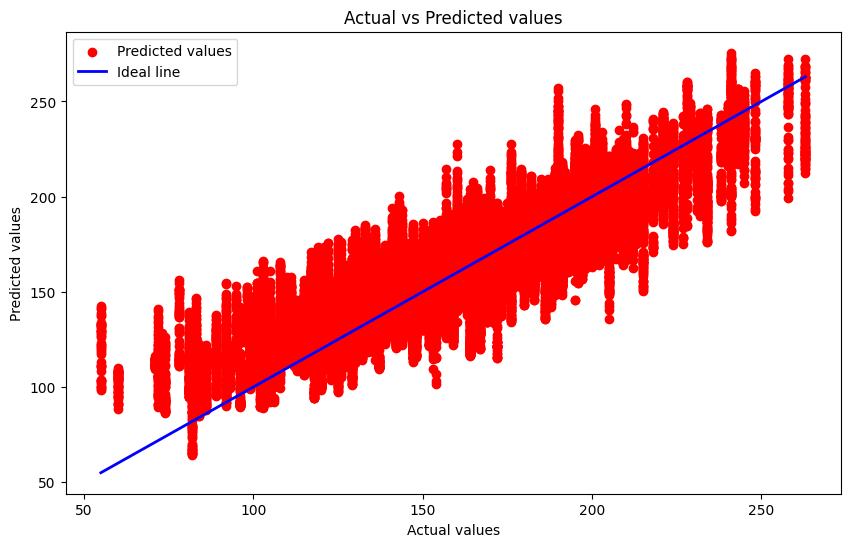

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='red', label='Predicted values')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='blue', linewidth=2, label='Ideal line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()

In [19]:
model.save('model_run_predictor.keras')